<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Building Autoencoders**


Estimated time needed: **30** minutes


In this lab, you will learn how to build autoencoders using Keras.  


## Learning Objectives

By the end of this lab, you will:

- Load and preprocess the MNIST dataset for training an autoencoder.

- Construct a simple autoencoder model using the Keras functional API.

- Train the autoencoder on the MNIST dataset.

- Evaluate the performance of the trained autoencoder.

- Fine-tune the autoencoder to improve its performance.

- Use the autoencoder to denoise images.


----


### Step-by-Step Instructions:

#### Step 1: Data Preprocessing

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector.


In [1]:
#!pip install tensorflow==2.16.2
!pip install --upgrade ml-dtypes


In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In the above code:
- Use Keras to load the MNIST dataset.
- Normalize the image pixel values to the range [0, 1].
- Flatten the 28x28 images to a 784-dimensional vector to reshape the data.


#### Step 2: Building the Autoencoder Model

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss.


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Summary of the model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In the above code:

**1. Define the Encoder:**
- Create an input layer with 784 neurons.
- Add a Dense layer with 64 neurons and ReLU activation.

**2. Define the Bottleneck:**
- Add a Dense layer with 32 neurons and ReLU activation.

**3. Define the Decoder:**
- Add a Dense layer with 64 neurons and ReLU activation.
- Add an output layer with 784 neurons and sigmoid activation.

**4. Compile the Model:**
- Use the Adam optimizer and binary crossentropy loss.  


#### Step 3: Training the Autoencoder

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself.


In [4]:
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.3616 - val_loss: 0.1807
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1715 - val_loss: 0.1462
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1437 - val_loss: 0.1303
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1293 - val_loss: 0.1213
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1213 - val_loss: 0.1159
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1167 - val_loss: 0.1126
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1130 - val_loss: 0.1093
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1101 - val_loss: 0.1064
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1075 - val_loss: 0.1044
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1051 - val_loss: 0.1029
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1040 - val_loss: 0.1016
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13m

In the above code:
- Use the `fit` method to train the model on the training data.
- Set the number of epochs to 25 and the batch size to 256..
- Use the test data for validation.


#### Step 4: Evaluating the Autoencoder

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data.


In [5]:
!pip install matplotlib==3.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


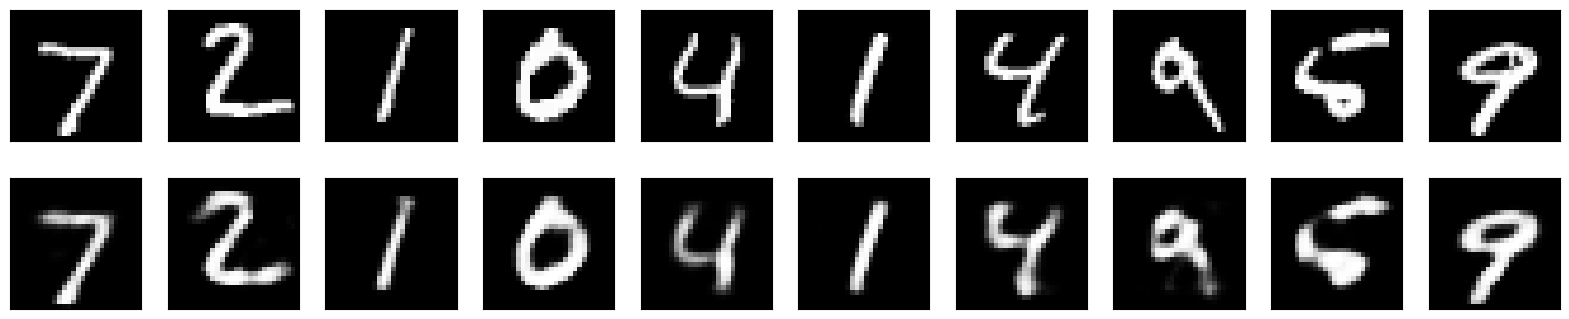

In [6]:
import matplotlib.pyplot as plt

# Predict the test data
reconstructed = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code:

**1. Reconstruct Images:**
- Use the autoencoder to predict the test data.
- Compare the original test images with the reconstructed images.

**2. Visualize the Results:**
- Plot a few examples of original and reconstructed images side by side.


#### Step 5: Fine-Tuning the Autoencoder

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.


In [7]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False


In [8]:
# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")


Layer 0: input_layer, Trainable = False
Layer 1: dense, Trainable = False
Layer 2: dense_1, Trainable = False
Layer 3: dense_2, Trainable = False
Layer 4: dense_3, Trainable = False


In [9]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]:
    layer.trainable = True

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model again
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0961 - val_loss: 0.0926
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0938 - val_loss: 0.0923
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0933 - val_loss: 0.0922
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0928 - val_loss: 0.0918
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0928 - val_loss: 0.0916
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0924 - val_loss: 0.0912
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0923 - val_loss: 0.0910
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0921 - val_loss: 0.0909
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0918 - val_loss: 0.0906
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0915 - val_loss: 0.0907


In the above code:

**1. Freeze all the Encoder Layers:**
- Freeze all the layers of the encoder.

**2. Check the Status:**
- Checking the trainable status of each layer.

**3. Unfreeze the Encoder Layers:**
- Unfreeze the last four layers of the encoder.

**4. Compile and Train the Model:**
- Recompile the model.
- Train the model again for 10 epochs with the same training and validation data.


#### Step 6: Denoising Images with Autoencoder

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images.


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2024 - val_loss: 0.1418
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1398 - val_loss: 0.1329
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1324 - val_loss: 0.1292
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1290 - val_loss: 0.1268
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1267 - val_loss: 0.1252
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1257 - val_loss: 0.1242
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1245 - val_loss: 0.1237
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1240 - val_loss: 0.1231
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1230 - val_loss: 0.1227
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1227 - val_loss: 0.1223
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1227 - val_loss: 0.1222
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

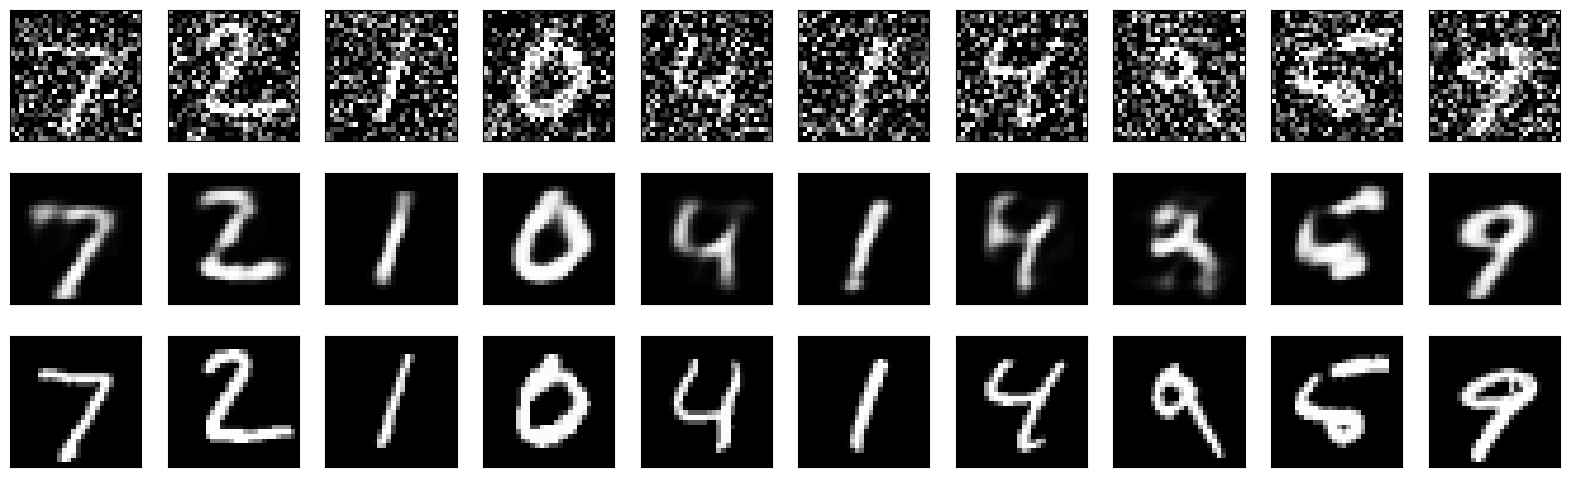

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code:

**1. Add noise to the data:**
- Add random noise to the training and test data.
- Train the Autoencoder with noisy data:
-Train the autoencoder using the noisy images as input and the original images as target.

**2. Evaluate the denoising performance:**
- Use the autoencoder to denoise the test images.
- Compare the noisy, denoised, and original images.


## Practice Exercises:

### Exercise 1: Exploring Different Bottleneck Sizes

#### Objective:

To understand the impact of different bottleneck sizes on the performance of the autoencoder.

#### Instructions:

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons).
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer.

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256.
- Use the same preprocessing steps as in the main lab.

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data.
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data.



Training autoencoder with bottleneck size: 16

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3694 - val_loss: 0.1803
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1717 - val_loss: 0.1489
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1459 - val_loss: 0.1349
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1344 - val_loss: 0.1286
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1289 - val_loss: 0.1255
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1263 - val_loss: 0.1234
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1245 - val_loss: 0.1221
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1231 - val_loss: 0.1210
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1220 - val_loss: 0.1199
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1210 - val_loss: 0.1192
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1206 - val_loss: 0.1184


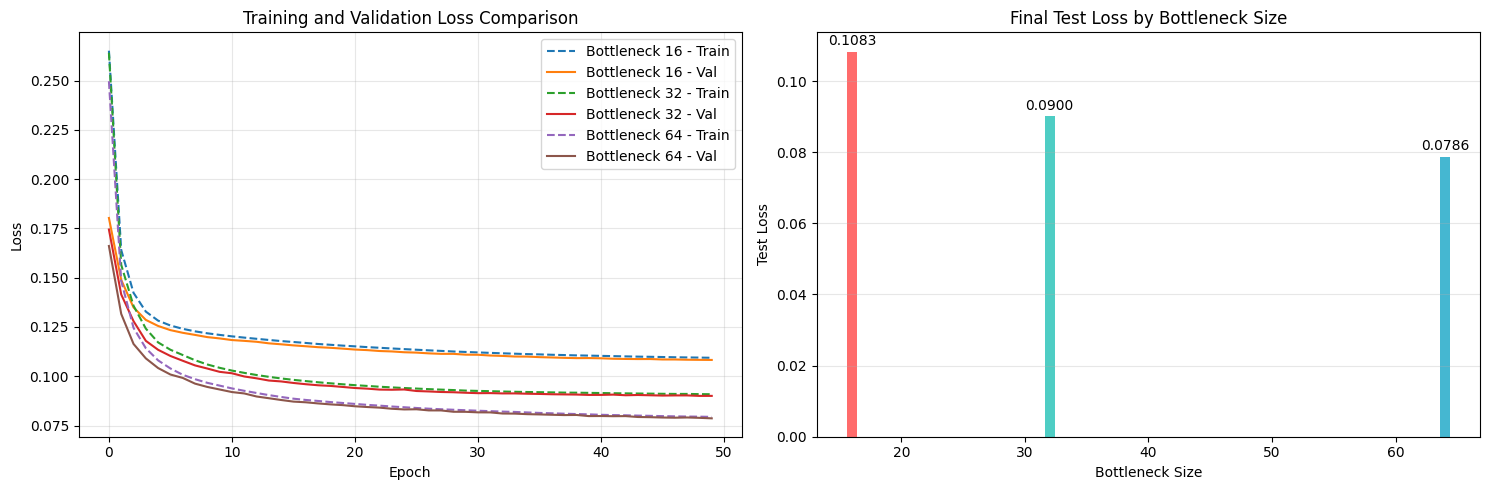

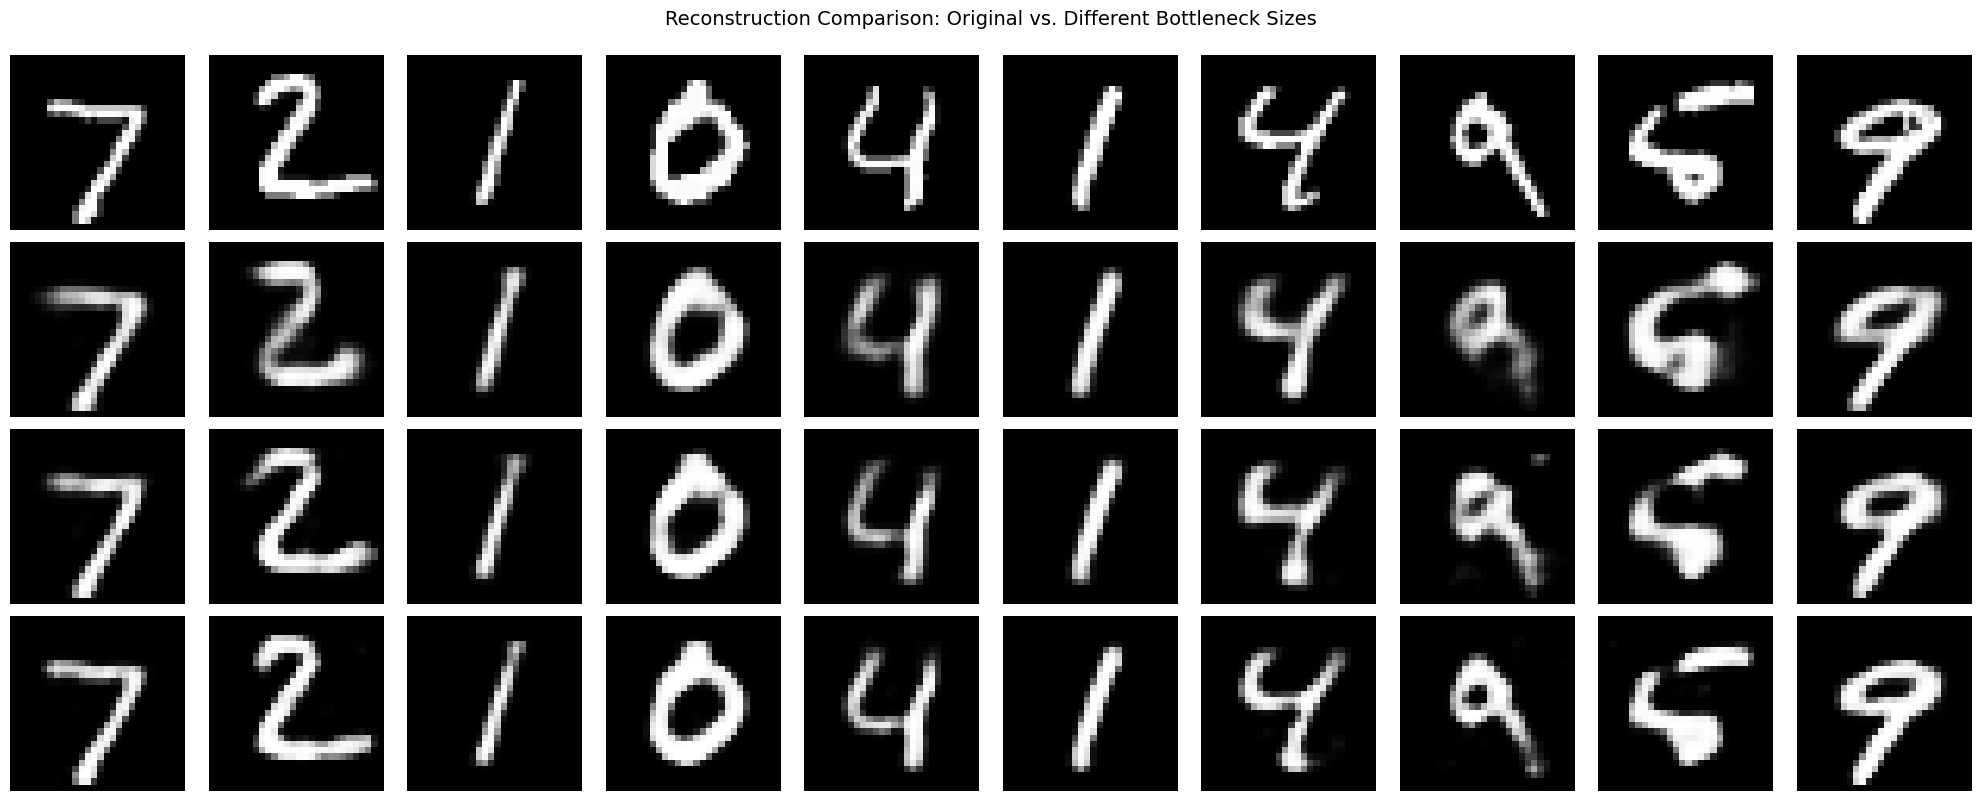


ANALYSIS

As the bottleneck size increases:
- The model has more capacity to store information
- Reconstruction loss typically decreases (better reconstruction)
- However, larger bottlenecks may lead to less compression

Best performing model: Bottleneck size 64 (Lowest loss: 0.0786)


In [11]:
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = {}
training_histories = {}

for size in bottleneck_sizes:
    print(f"\n{'='*60}")
    print(f"Training autoencoder with bottleneck size: {size}")
    print(f"{'='*60}\n")

    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)

    # Bottleneck with specified size
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Train the model
    history = autoencoder.fit(
        x_train,
        x_train,
        epochs=50,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test),
        verbose=1
    )

    # Store the model and training history
    autoencoders[size] = autoencoder
    training_histories[size] = history

# Evaluate and compare the models
print(f"\n{'='*60}")
print("EVALUATION RESULTS")
print(f"{'='*60}\n")

results = {}
for size in bottleneck_sizes:
    loss = autoencoders[size].evaluate(x_test, x_test, verbose=0)
    results[size] = loss
    print(f'Bottleneck size {size:2d} - Test loss: {loss:.4f}')

# Visualize training history comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for size in bottleneck_sizes:
    plt.plot(training_histories[size].history['loss'], label=f'Bottleneck {size} - Train', linestyle='--')
    plt.plot(training_histories[size].history['val_loss'], label=f'Bottleneck {size} - Val', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sizes = list(results.keys())
losses = list(results.values())
plt.bar(sizes, losses, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel('Bottleneck Size')
plt.ylabel('Test Loss')
plt.title('Final Test Loss by Bottleneck Size')
plt.grid(True, alpha=0.3, axis='y')

for i, (size, loss) in enumerate(results.items()):
    plt.text(size, loss + 0.001, f'{loss:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualize sample reconstructions from each model
n = 10  # Number of digits to display
fig, axes = plt.subplots(4, n, figsize=(20, 8))

for i in range(n):
    # Display original
    axes[0, i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Original', fontsize=12)

    # Display reconstructions for each bottleneck size
    for idx, size in enumerate(bottleneck_sizes):
        reconstructed = autoencoders[size].predict(x_test[i:i+1], verbose=0)
        axes[idx+1, i].imshow(reconstructed[0].reshape(28, 28), cmap='gray')
        axes[idx+1, i].axis('off')
        if i == 0:
            axes[idx+1, i].set_ylabel(f'Bottleneck {size}', fontsize=12)

plt.suptitle('Reconstruction Comparison: Original vs. Different Bottleneck Sizes', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ANALYSIS")
print(f"{'='*60}")
print("\nAs the bottleneck size increases:")
print("- The model has more capacity to store information")
print("- Reconstruction loss typically decreases (better reconstruction)")
print("- However, larger bottlenecks may lead to less compression")
print(f"\nBest performing model: Bottleneck size {min(results, key=results.get)} (Lowest loss: {results[min(results, key=results.get)]:.4f})")


<details>
    <summary>Click here for Solution</summary>

```python
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')
```

</details>


### Exercise 2 - Adding Regularization to the Autoencoder

#### Objective:

To explore the effect of regularization on the performance of the autoencoder.

#### Instructions:

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder.

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256.

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version.


Training Non-Regularized Autoencoder
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3721 - val_loss: 0.1794
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1693 - val_loss: 0.1438
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1409 - val_loss: 0.1286
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1275 - val_loss: 0.1202
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1203 - val_loss: 0.1145
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1156 - val_loss: 0.1108
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1114 - val_loss: 0.1076
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1085 - val_loss: 0.1048
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1060 - val_loss: 0.1032
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1042 - val_loss: 0.1015
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1026 - val_loss: 0.1003
Epoch 12/5

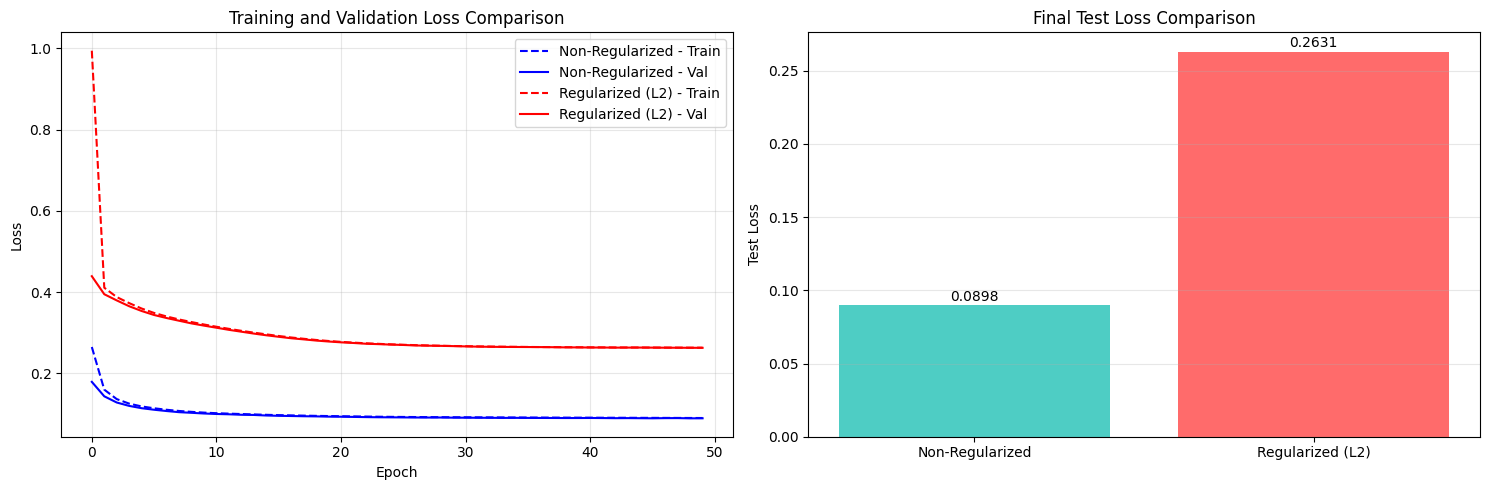

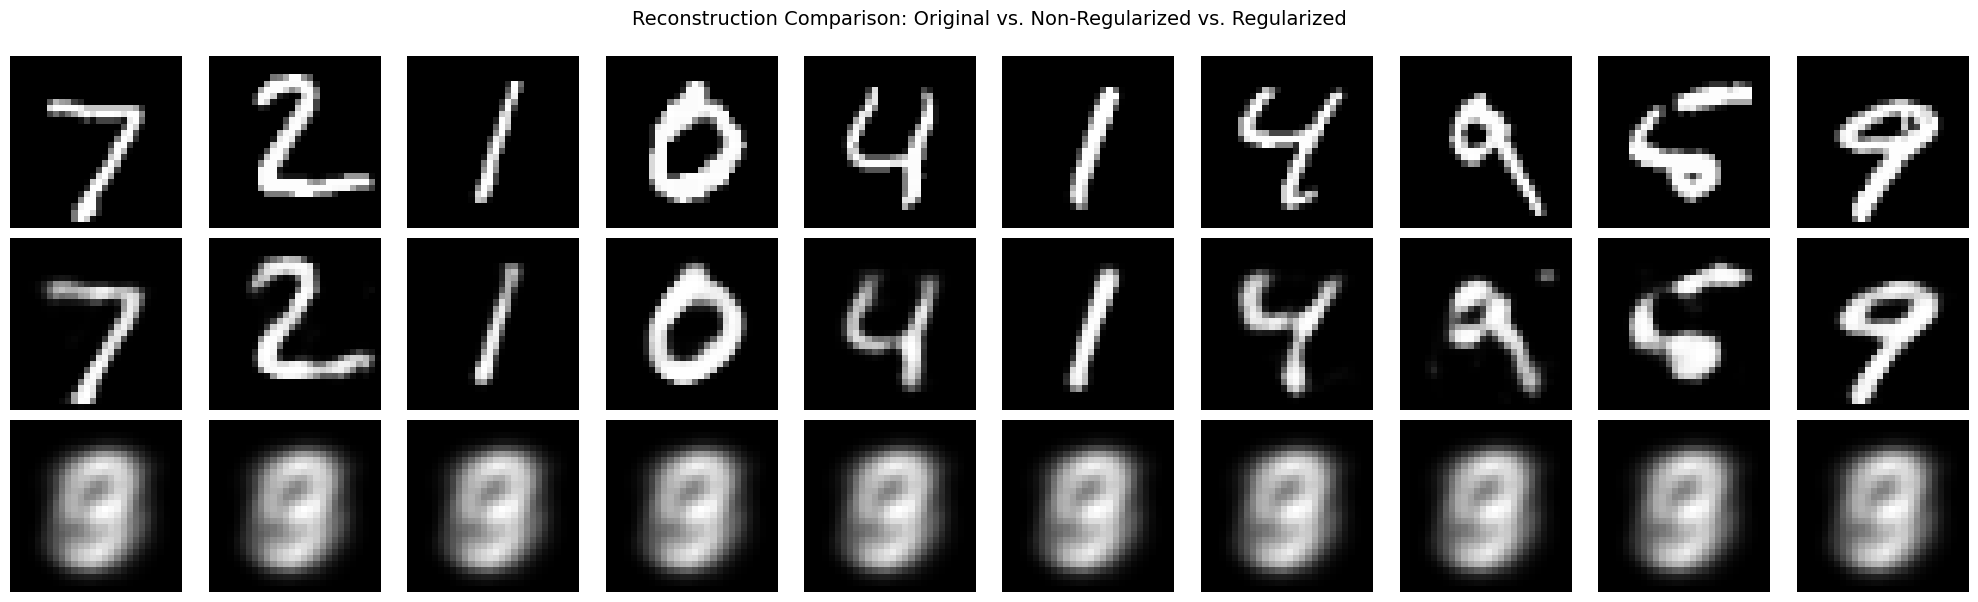


ANALYSIS

L2 regularization adds a penalty term to the loss function based on the
magnitude of the weights. This helps to:
- Prevent overfitting by constraining the model's complexity
- Improve generalization to unseen data
- Reduce the risk of large weight values

In this comparison, the non-regularized model
achieved a lower test loss, indicating similar or slightly worse performance.


In [12]:
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# First, create and train a non-regularized autoencoder for comparison
print("="*60)
print("Training Non-Regularized Autoencoder")
print("="*60)

# Non-regularized autoencoder
input_layer_base = Input(shape=(784,))
encoded_base = Dense(64, activation='relu')(input_layer_base)
bottleneck_base = Dense(32, activation='relu')(encoded_base)
decoded_base = Dense(64, activation='relu')(bottleneck_base)
output_layer_base = Dense(784, activation='sigmoid')(decoded_base)

autoencoder_base = Model(input_layer_base, output_layer_base)
autoencoder_base.compile(optimizer='adam', loss='binary_crossentropy')

# Train the non-regularized model
history_base = autoencoder_base.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

# Evaluate the non-regularized model
loss_base = autoencoder_base.evaluate(x_test, x_test, verbose=0)
print(f'\nNon-Regularized Autoencoder - Test loss: {loss_base:.4f}')

# Now create and train the regularized autoencoder
print("\n" + "="*60)
print("Training Regularized Autoencoder (L2 regularization)")
print("="*60)

# Encoder with L2 regularization
input_layer_reg = Input(shape=(784,))
encoded_reg = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer_reg)
bottleneck_reg = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded_reg)

# Decoder with L2 regularization
decoded_reg = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck_reg)
output_layer_reg = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded_reg)

# Autoencoder model with L2 regularization
autoencoder_regularized = Model(input_layer_reg, output_layer_reg)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')

# Train the regularized model
history_reg = autoencoder_regularized.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

# Evaluate the regularized model
loss_reg = autoencoder_regularized.evaluate(x_test, x_test, verbose=0)
print(f'\nRegularized Autoencoder - Test loss: {loss_reg:.4f}')

# Compare the results
print("\n" + "="*60)
print("COMPARISON RESULTS")
print("="*60)
print(f"Non-Regularized Autoencoder - Test loss: {loss_base:.4f}")
print(f"Regularized Autoencoder (L2) - Test loss: {loss_reg:.4f}")
print(f"Difference: {abs(loss_base - loss_reg):.4f}")

# Visualize training history comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_base.history['loss'], label='Non-Regularized - Train', linestyle='--', color='blue')
plt.plot(history_base.history['val_loss'], label='Non-Regularized - Val', linestyle='-', color='blue')
plt.plot(history_reg.history['loss'], label='Regularized (L2) - Train', linestyle='--', color='red')
plt.plot(history_reg.history['val_loss'], label='Regularized (L2) - Val', linestyle='-', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
models = ['Non-Regularized', 'Regularized (L2)']
losses = [loss_base, loss_reg]
colors = ['#4ECDC4', '#FF6B6B']
plt.bar(models, losses, color=colors)
plt.ylabel('Test Loss')
plt.title('Final Test Loss Comparison')
plt.grid(True, alpha=0.3, axis='y')

for i, (model, loss) in enumerate(zip(models, losses)):
    plt.text(i, loss + 0.001, f'{loss:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualize sample reconstructions
n = 10  # Number of digits to display
fig, axes = plt.subplots(3, n, figsize=(20, 6))

for i in range(n):
    # Display original
    axes[0, i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Original', fontsize=12)

    # Display non-regularized reconstruction
    reconstructed_base = autoencoder_base.predict(x_test[i:i+1], verbose=0)
    axes[1, i].imshow(reconstructed_base[0].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Non-Regularized', fontsize=12)

    # Display regularized reconstruction
    reconstructed_reg = autoencoder_regularized.predict(x_test[i:i+1], verbose=0)
    axes[2, i].imshow(reconstructed_reg[0].reshape(28, 28), cmap='gray')
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_ylabel('Regularized (L2)', fontsize=12)

plt.suptitle('Reconstruction Comparison: Original vs. Non-Regularized vs. Regularized', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ANALYSIS")
print("="*60)
print("\nL2 regularization adds a penalty term to the loss function based on the")
print("magnitude of the weights. This helps to:")
print("- Prevent overfitting by constraining the model's complexity")
print("- Improve generalization to unseen data")
print("- Reduce the risk of large weight values")
print(f"\nIn this comparison, the {'regularized' if loss_reg < loss_base else 'non-regularized'} model")
print(f"achieved a lower test loss, indicating {'better' if loss_reg < loss_base else 'similar or slightly worse'} performance.")

<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.regularizers import l2

# Encoder with L2 regularization
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded)

# Decoder with L2 regularization
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck)
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded)

# Autoencoder model with L2 regularization
autoencoder_regularized = Model(input_layer, output_layer)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Evaluate the model
loss = autoencoder_regularized.evaluate(x_test, x_test)
print(f'Regularized Autoencoder - Test loss: {loss}')
```

</details>


### Exercise 3 - Visualizing Intermediate Representations

#### Objective:

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder.

#### Instructions:

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features.

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space.
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


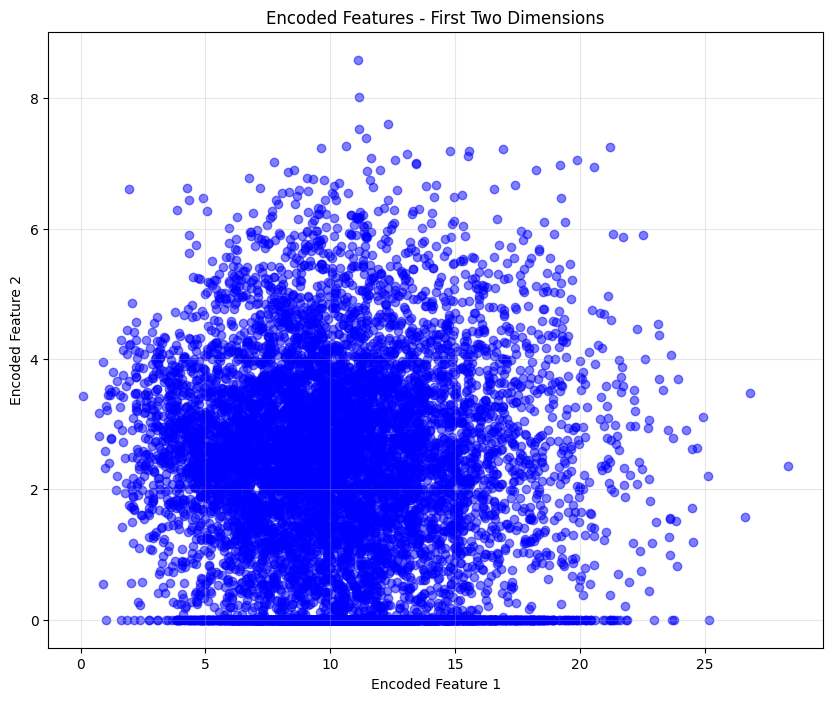

In [13]:
import matplotlib.pyplot as plt

# Extract the encoder part of the autoencoder
# The bottleneck layer is at index 2 (input=0, first dense=1, bottleneck=2)
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)

# Encode the test data
encoded_imgs = encoder_model.predict(x_test)

# Visualize the first two dimensions of the encoded features
plt.figure(figsize=(10, 8))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
plt.title('Encoded Features - First Two Dimensions')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python

import matplotlib.pyplot as plt

# Extract the encoder part of the autoencoder
encoder_model = Model(input_layer, bottleneck)

# Encode the test data
encoded_imgs = encoder_model.predict(x_test)

# Visualize the first two dimensions of the encoded features
plt.figure(figsize=(10, 8))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
plt.title('Encoded Features - First Two Dimensions')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()
```

</details>


#### Conclusion:

Congratulations on completing this lab! In this lab, you have gained practical experience in building, training, and evaluating autoencoders using Keras. You have learned to preprocess data, construct a basic autoencoder architecture, train the model on the MNIST dataset, and visualize the results. Additionally, you explored fine-tuning techniques to enhance the model's performance and applied the autoencoder to denoise images.

Continue experimenting with different architectures, datasets, and applications to further deepen your knowledge and skills in using autoencoders. The concepts and techniques you have learned in this lab will serve as a foundation for more advanced topics in deep learning.


## Authors


Skills Network


Copyright © IBM Corporation. All rights reserved.
